# Using Inbuilt Naive Bayes Classifier - MultinomialNB

In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string
import matplotlib.pyplot as plt

In [2]:
#Dataset Used can be downloaded from below link
#http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

#X is a list further made in form of tuple , 
# where first element is name of document and second is the text in documents.
#Y is the list of category

#change the path of dataset according to the your respective path
X  =[] 
Y = []
for category in os.listdir("Datasets"):
    for document in os.listdir("Datasets/"+category):
        with open("Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [3]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can notice that it is a tuple
#the tuple has its first element as name of document and second element as text of document.
print(X[1])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('51060', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51060 alt.atheism.moderated:727 news.answers:7300 alt.answers:155\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!agate!netsys!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Introduction to Atheism\nSummary: Please read this file before posting to alt.atheism\nKeywords: FAQ, atheism\nMessage-ID: <19930405122245@mantis.co.uk>\nDate: Mon, 5 Apr 1993 12:22:45 GMT\nExpires: Thu, 6 May 1993 12:22:45 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930308134439@mantis.co.uk>\nLines: 646\n\nArchive-name: atheism/introduction\nAlt-atheism-archive-name: introduction\nLast-modified: 5 

In [4]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y, random_state=0)

In [5]:
#split has done in nearly 3:1 ratio
#you can change the ratio of spliting by passing a argumnent in train_test_split() i.e, test_size
print(len(x_train))
print(len(x_test))

14997
5000


In [6]:
#Using RegEx to split the text into seprate words 
#Example for showing re.split
sample_text="Hey! I am Anshika. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Anshika', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [7]:
#Stop Words : words that are common in all type of text documents,
#they don't help us in finding the probability as they are common in every category
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [8]:
#Making Dictionary of words with their corresponding frequency
dicn={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of document and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into seprate words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dicn:
            dicn[s]+=1
        else:
            dicn[s]=1
dicn

{'xref': 4566,
 'cantaloupe': 19555,
 'srv': 24270,
 'cmu': 39355,
 'edu': 123562,
 'talk': 9215,
 'politics': 5842,
 'guns': 1930,
 'misc': 8968,
 'soc': 4564,
 'culture': 3166,
 'jewish': 1406,
 'newsgroups': 15285,
 'path': 15290,
 'das': 4537,
 'news': 25765,
 'harvard': 5184,
 'noc': 4646,
 'near': 5152,
 'net': 19162,
 'howland': 8242,
 'reston': 8226,
 'ans': 8316,
 'bogus': 1052,
 'sura': 2806,
 'darwin': 1827,
 'sgiblab': 325,
 'wetware': 147,
 'spunky': 77,
 'redbrick': 71,
 'com': 37175,
 'psinntp': 404,
 'billg': 14,
 'bony': 222,
 'bill': 1588,
 'gripp': 10,
 'subject': 16240,
 'next': 1549,
 'mormons': 368,
 'jews': 1259,
 'message': 16478,
 'organization': 14837,
 'references': 9749,
 'usenet': 6155,
 'ins': 1430,
 'cwru': 2027,
 'midway': 379,
 'uchicago': 559,
 'ucsu': 384,
 'colorado': 1236,
 'terminator': 68,
 'itd': 164,
 'umich': 477,
 'date': 15599,
 'tue': 1809,
 'apr': 15474,
 'gmt': 13317,
 'lines': 15678,
 'article': 10048,
 'jlove': 14,
 'ivrit': 20,
 'jack':

In [9]:
#Sorting the dictionary on basis of frequency of words in descending order
#you can read more about itemgetter using help(operator.itemgetter)
sorted_dicn = sorted(dicn.items(), key=operator.itemgetter(1),reverse=True)
sorted_dicn

[('edu', 123562),
 ('cmu', 39355),
 ('com', 37175),
 ('news', 25765),
 ('not', 24894),
 ('srv', 24270),
 ('cantaloupe', 19555),
 ('net', 19162),
 ('message', 16478),
 ('subject', 16240),
 ('lines', 15678),
 ('date', 15599),
 ('apr', 15474),
 ('path', 15290),
 ('newsgroups', 15285),
 ('organization', 14837),
 ('can', 14816),
 ('state', 14239),
 ('gmt', 13317),
 ('ohio', 12036),
 ('one', 11709),
 ('will', 11534),
 ('writes', 11009),
 ('article', 10048),
 ('comp', 9955),
 ('references', 9749),
 ('talk', 9215),
 ('misc', 8968),
 ('ans', 8316),
 ('howland', 8242),
 ('sender', 8236),
 ('reston', 8226),
 ('don', 7862),
 ('people', 7726),
 ('like', 7648),
 ('university', 7467),
 ('just', 7369),
 ('posting', 7319),
 ('nntp', 7021),
 ('mps', 6959),
 ('know', 6705),
 ('host', 6680),
 ('sci', 6622),
 ('get', 6432),
 ('zaphod', 6269),
 ('think', 6169),
 ('usenet', 6155),
 ('may', 5943),
 ('alt', 5933),
 ('politics', 5842),
 ('windows', 5605),
 ('also', 5595),
 ('time', 5300),
 ('rutgers', 5262),
 (

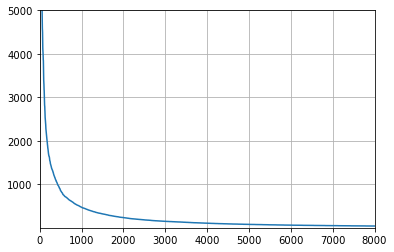

In [33]:
#Plotting graph on no. of words vs corresponding frequency
#On basis of graph we can decide the number of features(words) we want to take
features=sorted_dicn
ft_list=[]
ft_list_freq=[]
for i in range(len(features)):
    ft_list.append(i)
    ft_list_freq.append(features[i][1])
plt.plot(ft_list,ft_list_freq)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [11]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is ft_list
ft_list=[features[i][0] for i in range(2000)]
ft_list

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'path',
 'newsgroups',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'howland',
 'sender',
 'reston',
 'don',
 'people',
 'like',
 'university',
 'just',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'zaphod',
 'think',
 'usenet',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'time',
 'rutgers',
 'harvard',
 'use',
 'near',
 'eng',
 'new',
 'rec',
 'good',
 'sei',
 'crabapple',
 'noc',
 'xref',
 'soc',
 'system',
 'das',
 'well',
 'now',
 'cis',
 'max',
 'even',
 'see',
 'god',
 'religion',
 'europa',
 'gtefsd',
 'org',
 'world',
 'uunet',
 'ece',
 'way',
 'say',
 'make',
 'christian',
 'two',
 'many',
 'gov',
 'much',
 'first',
 'rochester',
 'right',
 'distribution',
 'club',
 'andrew',
 'mail',
 'space',
 'gatech',
 'magnesium',
 'anyone',
 'w

In [12]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of ft_list(feature list)
x_train_dataset=np.zeros([len(x_train),len(ft_list)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our ft_list(feature list)
        if j in ft_list:
            x_train_dataset[i][ft_list.index(j)]+=1

In [13]:
x_train_dataset

array([[ 9,  2,  3, ...,  0,  0,  0],
       [ 4,  1,  4, ...,  0,  0,  0],
       [ 2,  2,  8, ...,  0,  0,  0],
       ...,
       [ 5,  1,  6, ...,  0,  0,  0],
       [ 9,  3,  0, ...,  0,  0,  0],
       [13,  1,  1, ...,  0,  0,  0]])

In [14]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(ft_list)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in ft_list:
            x_test_dataset[i][ft_list.index(j)]+=1

In [15]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 9  2  3 ...  0  0  0]
 [ 4  1  4 ...  0  0  0]
 [ 2  2  8 ...  0  0  0]
 ...
 [ 5  1  6 ...  0  0  0]
 [ 9  3  0 ...  0  0  0]
 [13  1  1 ...  0  0  0]]
--------------------------
[[ 9  4  0 ...  0  0  0]
 [ 7  4  7 ...  0  0  0]
 [10  3  8 ...  0  0  0]
 ...
 [ 2  1  7 ...  0  0  0]
 [17  3  0 ...  0  0  0]
 [ 3  1  0 ...  0  0  0]]


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [17]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8933786757351471
Score on testing data: 0.8558
[[190   0   0   0   0   0   1   2   2   0   0   0   1   2   0   1   0   0
    0  34]
 [  0 202  12  20   3   8   4   2   0   1   0   0   0   1   0   0   0   0
    0   0]
 [  0  10 193  17   5  15   2   1   0   0   0   1   3   1   1   0   0   0
    0   0]
 [  0   0   3 196  32   0   5   0   1   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   2   0  25 203   0   6   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  17  20  11  11 169   2   0   1   0   0   1   4   2   2   0   0   0
    0   0]
 [  0   0   1   7   3   0 233   7   2   0   1   0   6   0   1   0   0   0
    0   0]
 [  0   0   0   1   1   0  11 247   2   1   1   0   5   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   5 274   2   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   4   1   2 227  13   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   6 223   0   0   0   1   0   0   0
   

# Self Implementation of Naive Baye's

In [24]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of documents is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over ft_list(actual feature list)
        for feature in ft_list:
            #Calculating total word in feature
            l=(x_train_with_i[:,ft_list.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [25]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [26]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [27]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [28]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [29]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [30]:
dictionary

{'total_doc': 14997,
 'rec.autos': {'edu': 5801,
  'cmu': 1758,
  'com': 2255,
  'news': 1323,
  'not': 830,
  'srv': 1056,
  'cantaloupe': 868,
  'net': 858,
  'message': 762,
  'subject': 769,
  'lines': 746,
  'date': 746,
  'apr': 756,
  'path': 739,
  'newsgroups': 745,
  'organization': 723,
  'can': 555,
  'state': 813,
  'gmt': 686,
  'ohio': 733,
  'one': 424,
  'will': 430,
  'writes': 579,
  'article': 584,
  'comp': 4,
  'references': 534,
  'talk': 12,
  'misc': 73,
  'ans': 398,
  'howland': 392,
  'sender': 372,
  'reston': 392,
  'don': 362,
  'people': 190,
  'like': 403,
  'university': 330,
  'just': 374,
  'posting': 380,
  'nntp': 363,
  'mps': 368,
  'know': 285,
  'host': 343,
  'sci': 27,
  'get': 329,
  'zaphod': 345,
  'think': 263,
  'usenet': 387,
  'may': 168,
  'alt': 89,
  'politics': 0,
  'windows': 25,
  'also': 280,
  'time': 218,
  'rutgers': 10,
  'harvard': 250,
  'use': 140,
  'near': 263,
  'eng': 191,
  'new': 276,
  'rec': 1295,
  'good': 299,
 

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.8722
[[205   0   0   1   0   1   1   1   1   1   0   0   0   2   0   0   0   0
    1  19]
 [  0 209   6  22   4   4   4   0   0   1   0   0   1   2   0   0   0   0
    0   0]
 [  0  22 171  25   3  18   2   0   0   0   0   3   2   0   2   0   0   0
    1   0]
 [  0   3   0 203  28   0   5   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   2   0  21 207   0   6   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  25  16   4   6 183   2   0   0   0   0   1   1   1   1   0   0   0
    0   0]
 [  0   0   0  10   1   0 231   7   0   0   0   0  10   1   1   0   0   0
    0   0]
 [  0   0   0   0   1   1  10 250   2   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   1 280   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   2 235   9   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   0   3 226   0   0   0   0   0   0   0
    0   0]
 [  0   4   0   0   0   1   0   0  